#  Week 6: Classification
## Support Vector Machine (SVM)

In this notebook we are going to implement SVM algorithm for classification. You will:

* Complete the ***SVM()*** function to train SVM algorithm for classification tasks using scikit learn.
* Complete the function ***img_NewSVM()***  which builds and trains SVM algorithm for binary classification.


# Import libraries

The required libraries for this notebook are pandas, sklearn, copy, numpy, pickle and matplotlib.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.datasets import load_iris


# Load the data
We are going to use the iris dataset (as we did in the previous notebook) but we are going to use only 2 features out of 4. 

In [2]:
# Loading the data file
data = load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
#print(df.head())

# Drop rest of the features and extract the target values
Y = data.target
X = data.data[:, :2]

# Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)


# Use SVM from a library

Implement SVM using `SVC()` function from the scikit-learn library:

In [3]:
def SVM(x_train,y_train, x_test):
    model = SVC(kernel='linear')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred
# Scikit learn library results
y_pred=SVM(x_train,y_train, x_test)
print(accuracy_score(y_test,y_pred))


0.8222222222222222


# Experiment with different kernels

You can use the following kernel functions implemented in the scikit learn library:
1. linear: \begin{align} <x,x'> \end{align}

2. polynomial: \begin{align} (\gamma <x,x'> +r)^d\end{align} 
3. rbf:\begin{align}e^{(-\gamma||x-x'||^2)} \end{align} 


or create your own custom kernel.

**Note:** You should not scale the data since we are interested in plotting the support vectors.


c:\Users\wojtek\.virtualenvs\ELEC0134_-_Applied_Machine_Learning_System-Sw1Hgpu6\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


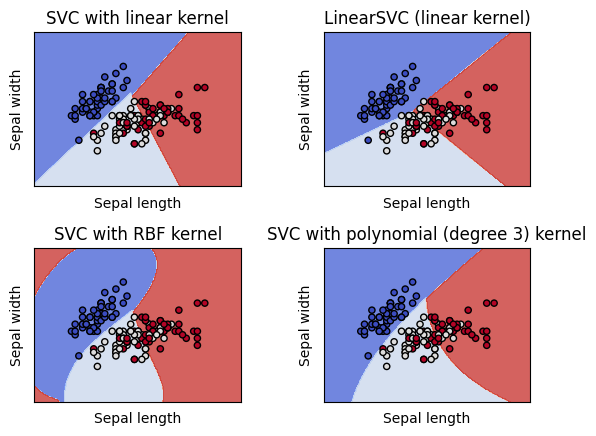

In [4]:
# TODO
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, Y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')



# TODO
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# TODO
def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# TODO
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Use an image dataset instead of a numerical one

This example uses a subset of the celebA dataset that includes 137 images of celebrity faces and labels.csv file which contains the associated labels (1 for female and −1 for male). 
Note that we will use features extracted from images rather than images themselves.This is further discussed in the file **landmarks.py** that we encourage you to review.

# Import the required libraries

In [1]:
from os.path import join

from importlib.machinery import SourceFileLoader
# somemodule = SourceFileLoader('lab2_landmarks', join('lab2_landmarks.py')).load_module()
import lab2_landmarks as l2
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm

# Feature extraction
We can extract relevant features from the images by using face detector from dlib library which consists of a combination of the Histogram of Oriented Gradients (HOG) feature with a linear classifier, an image pyramid,and sliding window detection scheme. 

The image below visualizes the location of 68 facial regions that dlib detects:

![image.Z4AUVZ.png](attachment:image.Z4AUVZ.png)

We can obtain these features given an image by simply calling the ***extract_features_labels()*** function in the landmarks.py file. 

Using these features is optional, since there is a variety of facial landmarks detectors you could choose from. Also the same dlib framework can be used to train other facial landmark detectors or custom shape predictors.

In [2]:
def get_data():
    
    X, y = l2.extract_features_labels()
    
    Y = np.array([y, -(y - 1)]).T
    tr_X = X[:100]
    tr_Y = Y[:100]
    te_X = X[100:]
    te_Y = Y[100:]

    return tr_X, tr_Y, te_X, te_Y



In [3]:
# sklearn functions implementation

def img_SVM(training_images, training_labels, test_images, test_labels):
    classifier = svm.SVC(kernel='linear')

    classifier.fit(training_images, training_labels)

    pred = classifier.predict(test_images)

    print(pred)

    print("Accuracy:", accuracy_score(test_labels, pred))

tr_X, tr_Y, te_X, te_Y= get_data()


pred=img_SVM(tr_X.reshape((100, 68*2)), list(zip(*tr_Y))[0], te_X.reshape((36, 68*2)), list(zip(*te_Y))[0])

    

[1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
Accuracy: 0.8055555555555556
